# **Explanatory Data Analysis of UAE Used Car Prices & Features**

### **Submitted by:** Aditya Rautela

### **Student Number:** GH1033598

### **Programme:** MSc Data Science, AI, and Digital Business

### **Submitted to:** Prof. Amirhossein Jamalian

# **1.   Business Context**

**United Arab Emirates** (here after refered as UAE) is one of world's leading consumer markets for automobiles.

Recently, with the growing purchasing power and aspiration, more and more people have started buying cars.

Now to leverage the opportunity a company with an extensive portfolio of used cars wants to **capture the maximum market targeting customers** with limited funds to get some high-end used cars.

They have prepared an Excel sheet of the **10,000 used cars** they have with complete details of the car (which includes details of the car maker, the car model, the year of manifucturing, price it is available in, the km it had run for, body type of the car, the number of cylinders it has, transmission of the car, the city of the car, and the description of the car).

They planed to consult a data scientist and get some insights about their data and evaluate how can the maximise the opportunity to grow in the market by making the most apt car available at the right time.

So, me as a data scientist plan to implement the following steps so as they can attain maximum profit out of the situation:


# **2.   Objective**

As a data scientist, I have the following objectives:

a. Explore, clean, and interpret the data for the
client to maximise the value that can be generated.

b. Evalauting and presenting the data in a way that the client can get the best insights about the available inventory.

# **3.  Data Source**

To attain the data set I have used Kaggle and the link for the data set is listed below:

https://www.kaggle.com/datasets/alikalwar/uae-used-car-prices-and-features-10k-listings/code

# **4. Business questions to be answered as a part of EDA:**

a. Which are the car makers and the models which retain the highest resale value over time, and in what ways it differ based on body type and transmission type?

b. What can be the optimal pricing strategy for the used cars based on kilometers, year of manufacturing and city of origin?

c. What can be the potential trend in buyers preference that can be evalauted across different cities, and how can it help in inventory management.

d. Does the condition of the car really impact their sellability and price and can it be used to create a car condition evaluating system?

e. As per the location of the car offers the best possibility for arbitrage based on price differences for similar car types.



# **5. Importing libraries and dataset**

Now to start the EDA we will import some the important libraries which will help us with data exploration, cleaning and analysis.

Then, we are going to import our dataset and make Python read it.

★ **Note:** As the original data had no missing value for majority of its coloumns, we had to inject some missing value and thus for the analysis part we will be using the data set with injected values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_org = pd.read_csv('uae_used_cars_10k_nan.csv')
df_org.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016.0,47819.0,156500.0,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013.0,61250.0,169543.0,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023.0,31861.0,221583.0,Soft Top Convertible,NaN,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016.0,110322.0,69754.0,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020.0,139994.0,71399.0,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


In [ ]:
print("Number of rows and coloumn:", df_org.shape)

Number of rows and coloumn: (10000, 12)


Through our data exploration we got to know that there are a total of **12** coloumns which include the car maker, car model. the year of manufacturing, the price the car is available, the total distance coverd by the car, the body type of the car(eg. SUV, Sedan, etc.), the number of cyliner the car have, the gear transmission, the fuel type of car, the color of car, the location of the car available in, and description of the.

The total number of entries are **10,000**.

In [ ]:
df_org.dtypes

,0
Make,object
Model,object
Year,float64
Price,float64
Mileage,float64
Body Type,object
Cylinders,object
Transmission,object
Fuel Type,object
Color,object


### **Correction in data type**

We know that cyliners of a car is a numeric value and a numeric value must be under float64 data type but here it is said to be as object. Which means there must be some characters values which lead the data type as object and may impact our analysis.
Thus we need to treat these character values and covert them to NaN values.

The below code is taken from: https://www.kaggle.com/discussions/questions-and-answers/152635

In [ ]:
df_org['Cylinders'] = pd.to_numeric(df_org['Cylinders'], errors='coerce')

Now our Cyliner's values are all numeric value **(float64)**

In [ ]:
df_org.dtypes

,0
Make,object
Model,object
Year,float64
Price,float64
Mileage,float64
Body Type,object
Cylinders,float64
Transmission,object
Fuel Type,object
Color,object


# **6. Data Exploration**

For a data scientist it is important to know every bits and peices of the data and thus it is important to explore the data and get some insights about the data.


Now to know the exact number of available brand we have **(we have cars with 65 different brands)**, the total different model **(we have 488 unique models)** the oldest and the newest model **(2005 and 2024 repectively)**, and the number of cities are cars are form **(16 location across UAE)** we will perform the following code:

In [ ]:
df_org.describe(include='all')

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
count,9920,9932,9905.000000,9.894000e+03,9917.000000,9922,9759.000000,9927,9924,9923,9920,9908
unique,65,488,NaN,NaN,NaN,13,NaN,2,4,17,16,9894
top,mercedes-benz,patrol,NaN,NaN,NaN,SUV,NaN,Automatic Transmission,Gasoline,White,Dubai,2011 land-rover range-rover with Navigation sy...
freq,1473,380,NaN,NaN,NaN,4574,NaN,9555,9639,3336,7922,2
mean,NaN,NaN,2014.469965,2.450908e+05,155225.878794,NaN,6.219695,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.792760,4.714718e+05,83667.643103,NaN,1.932372,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2005.000000,7.183000e+03,10006.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2009.000000,5.030650e+04,82935.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2014.000000,1.025805e+05,154543.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2019.000000,2.309668e+05,227623.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN


To know the total number of missing values we will perform the following set of code:

In [ ]:
df_org.isnull().sum()

,0
Make,80
Model,68
Year,95
Price,106
Mileage,83
Body Type,78
Cylinders,241
Transmission,73
Fuel Type,76
Color,77


Now to address the null value we will follow the following steps:

We know that all the data about car are quiet unique amonst themselves and any method such as mean, median, mode may impact the analysis of the data as they might impact the correlation.
So we need to remove all the missing values.

Therefor we will get zero null values which will make our interpretation and analysis better and accurate.

In [ ]:
df_org.dropna(inplace=True)

Now we have zero null values.

In [ ]:
df_org.isnull().sum()

,0
Make,0
Model,0
Year,0
Price,0
Mileage,0
Body Type,0
Cylinders,0
Transmission,0
Fuel Type,0
Color,0


And we can see that we have now lesser rows after deletion of missing values.

In [ ]:
print("Number of rows and coloumn:", df_org.shape)

Number of rows and coloumn: (8901, 12)


# **7. Data Analysis and Visualisation**

**For our 1st business question:**

a. Which are the car makers and the models which retain the highest resale value over time, and in what ways it differ based on body type and transmission type?



For this question let's first understand the brand and the car models which have the highest resale value.

Source for code:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

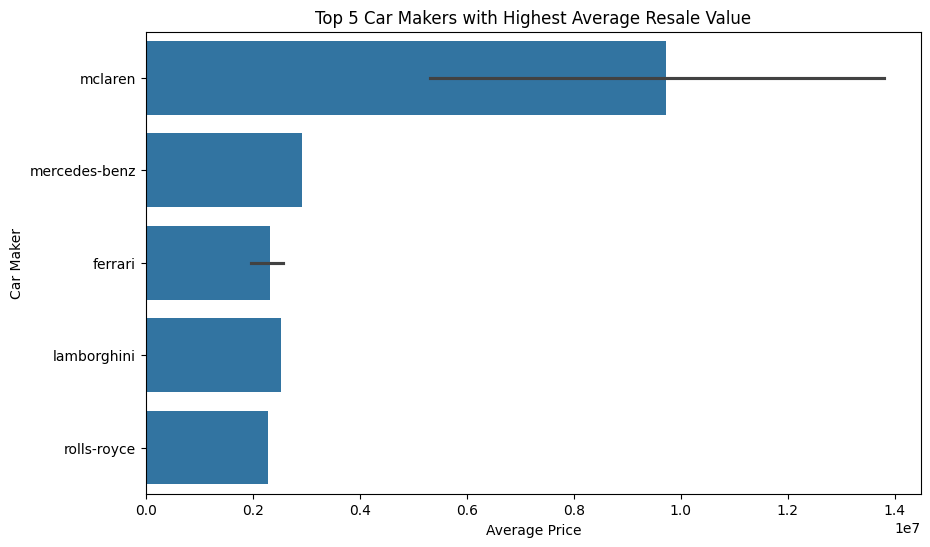

In [ ]:
car_prices = df_org.groupby(['Make', 'Model'])['Price'].mean().reset_index()

top_cars =car_prices.sort_values(by=['Price'], ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(x = "Price", y = "Make", data = top_cars.head(10), orient = 'h')
plt.title('Top 5 Car Makers with Highest Average Resale Value')
plt.xlabel('Average Price')
plt.ylabel('Car Maker')
plt.show()


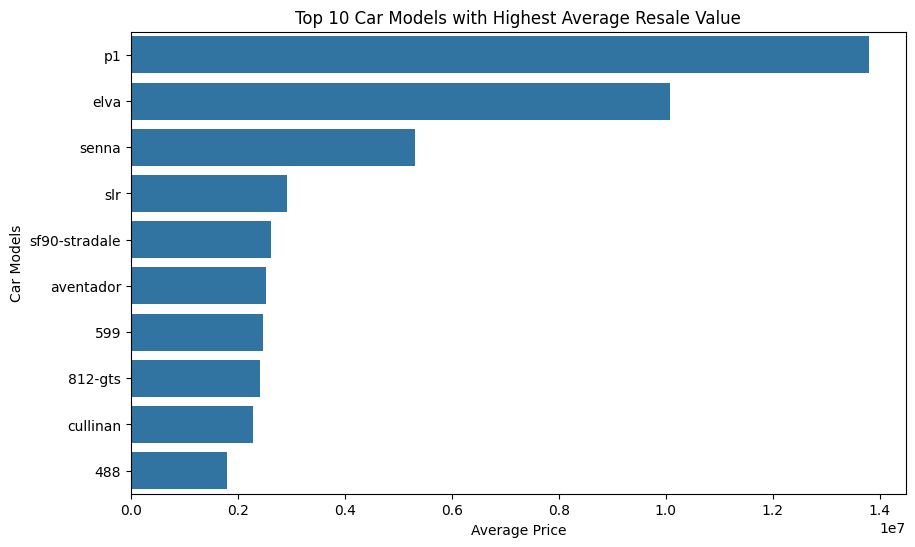

In [ ]:
car_prices = df_org.groupby(['Make', 'Model'])['Price'].mean().reset_index()

top_cars =car_prices.sort_values(by=['Price'], ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(x = "Price", y = "Model", data = top_cars.head(10), orient = 'h')
plt.title('Top 10 Car Models with Highest Average Resale Value')
plt.xlabel('Average Price')
plt.ylabel('Car Models')
plt.show()


We learned that a car maker named **"Mclaren"** and a car model named **"P1"** has the higghest average resale but it is essential for us to gain some specific knowledge about the insights.
And for that, we will have to create the following chart:

Source:
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

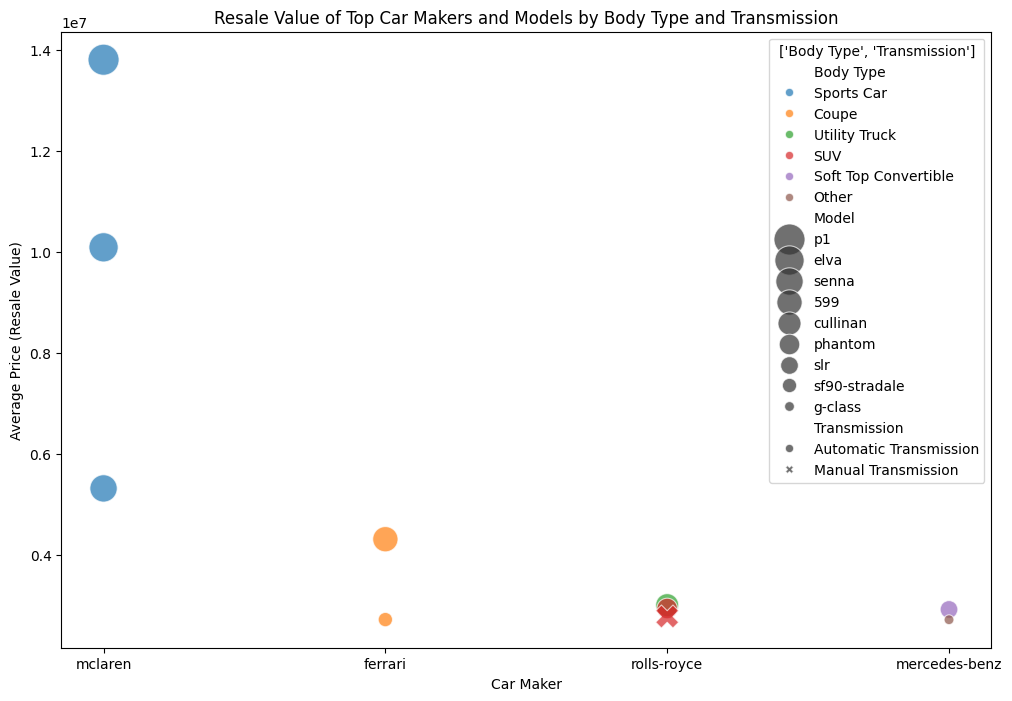

In [ ]:
car_prices = df_org.groupby(['Make', 'Model', 'Body Type', 'Transmission'])['Price'].mean().reset_index()

top_cars = car_prices.sort_values(by=['Price'], ascending= False).head(10)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Make', y='Price', size='Model', hue='Body Type', style='Transmission', data=top_cars, sizes=(50, 500), alpha=0.7)
plt.title('Resale Value of Top Car Makers and Models by Body Type and Transmission')
plt.xlabel('Car Maker')
plt.ylabel('Average Price (Resale Value)')
plt.legend(title=['Body Type', 'Transmission'])
plt.show()

The above graph reflects the following indications:

1. Almost 90% of the cars with the highest resale value are automatic transmission.

2. The highest valued cars are sports cars.

3. McLaren has the highest valued cars and have the highest resale value they can offer.

4. McLaren's P1(there are 2 of those) is the most expensive car amongst all.

In [ ]:
mclaren_p1_count = df_org[(df_org['Make'] == 'mclaren') & (df_org['Model'] == 'p1')].shape[0]

print("Number of McLaren P1 cars:", mclaren_p1_count)

Number of McLaren P1 cars: 2


**For Business question 2:**

What can be the optimal pricing strategy for the used cars based on kilometers, year of manufacturing and city of origin?

Source:
https://seaborn.pydata.org/generated/seaborn.lineplot.html


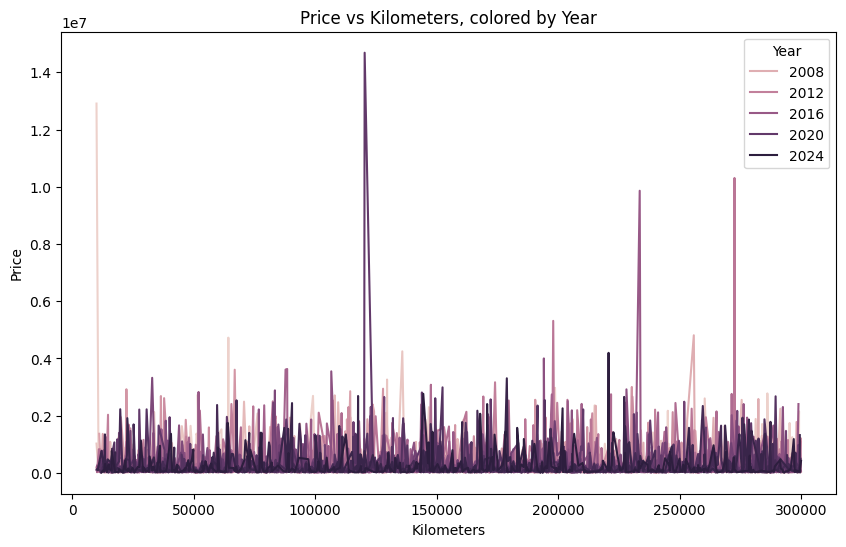

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Mileage', y = 'Price', data = df_org, hue = "Year")
plt.title('Price vs Kilometers, colored by Year')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.show()

From the above graph it can be said that irrespective of the fact that only a **few older cars have high price only and when they are less used**. While most the cars either old or new have a **lower resale value as they are being used more and more.**

Thus used cars need to be sold at lower rates to get them sold in the market.

Source:
https://seaborn.pydata.org/generated/seaborn.boxplot.html


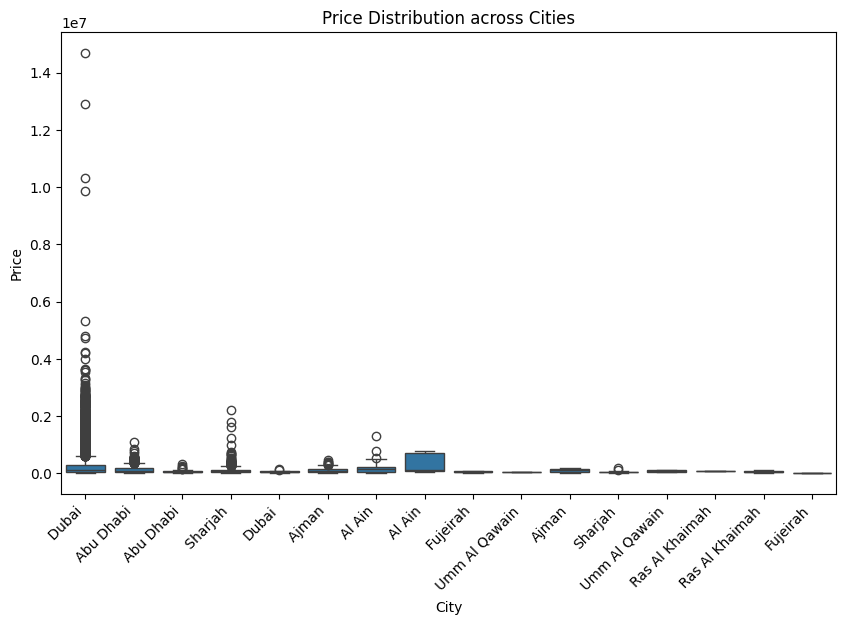

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=df_org)
plt.title('Price Distribution across Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

Here it can be observed that **city like Dubai have a very high resale** value while other cities accross UAE have a very low resale value.

**For Business question 3:**

What can be the potential trend in buyers preference that can be evalauted across different cities, and how can it help in inventory management.


Now to evaluate the following question we will have to create a bar diagram to understand which city has more availability of car and which are most available car models which are readily avaible in those cities.

Source:
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

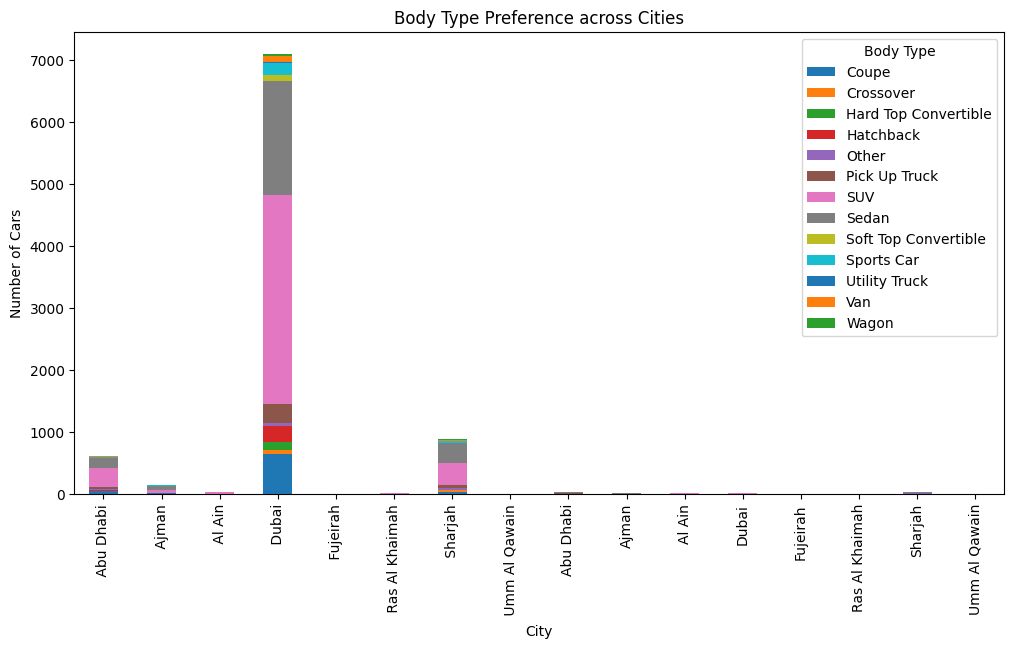

In [ ]:
city_body_types = df_org.groupby(['Location', 'Body Type'])['Body Type'].count().reset_index(name='Count')
city_body_types_pivot = city_body_types.pivot(index='Location', columns='Body Type', values='Count')

city_body_types_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Body Type Preference across Cities')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.legend(title='Body Type')
plt.show()

From the above graph we get an infrence that:

1. Dubai is the biggest market for used cars and brands across the market dealing in second hand market should focus on selling there second hand cars over there.

2. SUV is the body type which is the most available and has the biggest market in the UAE used car market.



**For Business question 4:**

Does the condition of the car really impact their sellability and price and can it be used to create a car condition evaluating system?


In our dataset we don't have a seperate coloumn for condition but the features about condition is mentioned in description feature thus it is important to split the coloumn into 2 features.

Source:
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html

In [ ]:
def split_data_after_word(df_org, Description , Condition):

    extracted_data = df_org[Description].str.split(Condition, n=1, expand=True)[1]
    return extracted_data.str.strip()

df_org['Condition'] = split_data_after_word(df_org, 'Description', 'Condition:')

df_org.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description,Condition
0,toyota,camry,2016.0,47819.0,156500.0,Sedan,4.0,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se...",Engine repaired.
1,kia,sorento,2013.0,61250.0,169543.0,SUV,4.0,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise...",Accident history.
3,nissan,altima,2016.0,110322.0,69754.0,Sedan,4.0,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ...",Minor scratches.
4,toyota,land-cruiser-76-series,2020.0,139994.0,71399.0,Pick Up Truck,4.0,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...,Dented door.
5,chevrolet,silverado,2010.0,43194.0,233934.0,Pick Up Truck,8.0,Automatic Transmission,Gasoline,Brown,Dubai,2010 chevrolet silverado with Navigation syste...,Repainted bumper.


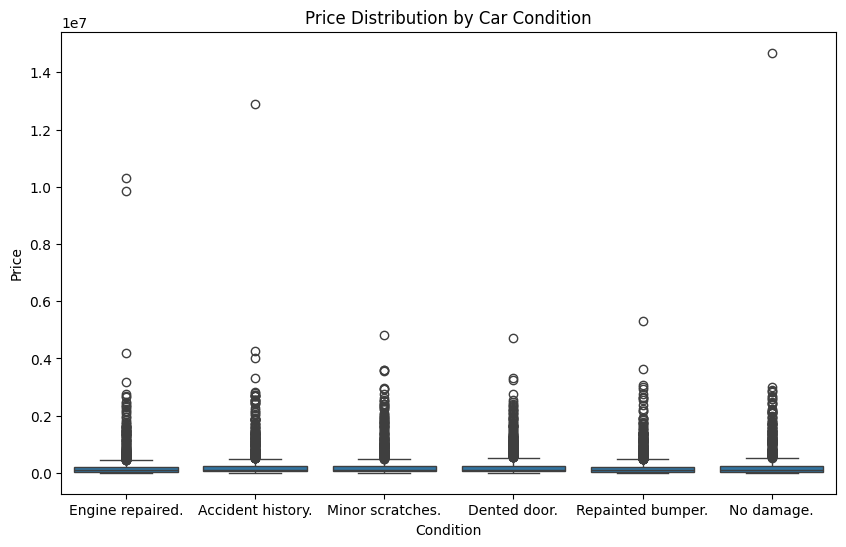

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Price', data=df_org)
plt.title('Price Distribution by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

Through the above chart it is well understood that almost every car which is used tends to have a low price range irrespective of their condition or past history.

The natural tendancy of humans is to treat all used car as same and thus are such low valued. Also we saw earlier that most of the cars have clocked large numbers in kilometers thus they are low valued.

**For Business question 5:**

As per the location of the car offers the best possibility for arbitrage based on price differences for similar car types.

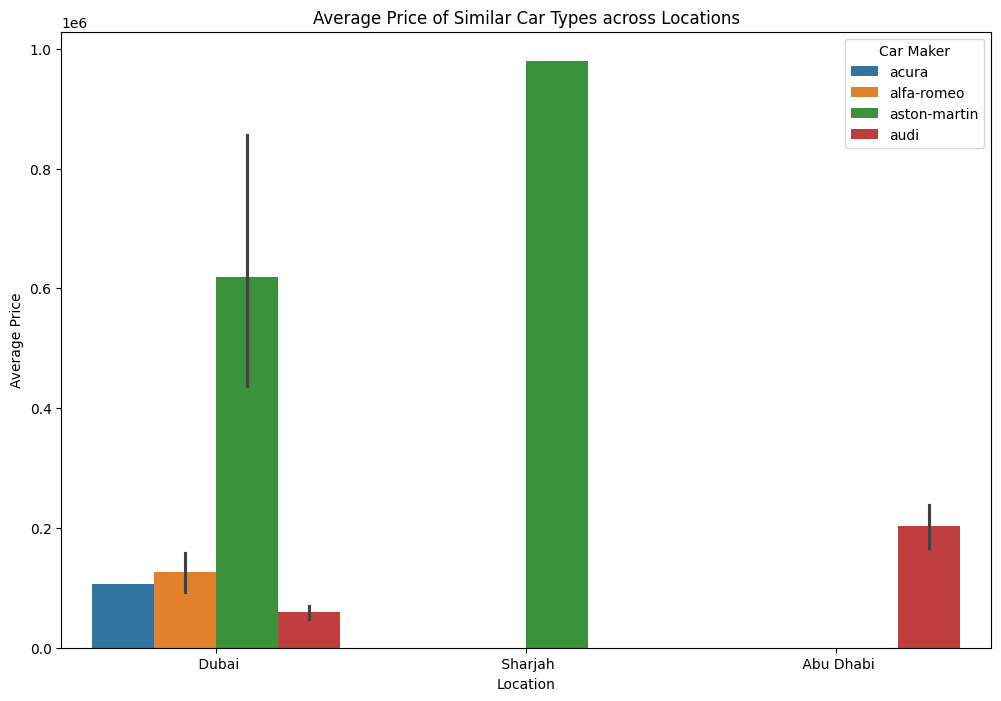

In [ ]:
location_prices = df_org.groupby(['Make', 'Model', 'Location'])['Price'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='Price', hue='Make', data=location_prices.head(20))

plt.title('Average Price of Similar Car Types across Locations')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.legend(title='Car Maker')
plt.show()

Yes, it is possible to arbitage when it comes to selling same or similar cars accross different cities in UAE.

**This is simply because in city like Dubai we saw the highly competitive and grouped market where there are many option for a buyer but in a city like Sharjah there are limited options avaible and a higher priced car would even be good option for a buyer looking to buy a car in that area.**

#**8. Conclusion**

Through the analysis of the above data set we get to a conclusion that:

1. When it comes to assessing the biggest used car market in UAE, Dubai has the most availability and higghest potential to be the most appealing used car market.

2. When it comes to used car the most common body type was found out to be **SUV** where are the most expensive and highly priced are **sports cars**.

3. Most of the used cars in **UAE** are highly used and have a huge usage records which is because of the infrastructure build around for transportation and thus the cars are generally price low.